# Murder Mistery
---

A crime has taken place and the detective needs your help. The detective gave you the crime
scene report, but you somehow lost it. You vaguely remember that the crime was a murder that
occurred sometime on Jan.15, 2018 and that it took place in SQL City. Start by retrieving the
corresponding crime scene report from the police department’s database.

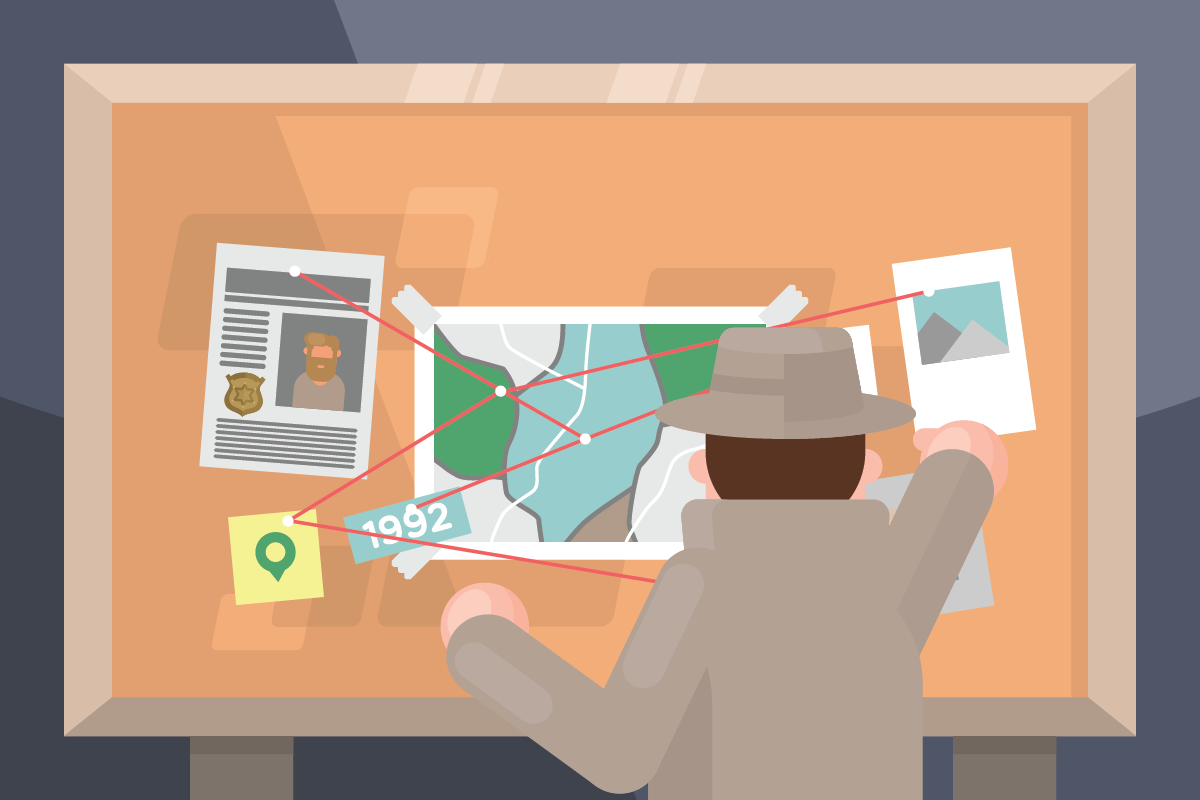

In [1]:
!git clone "https://github.com/NUKnightLab/sql-mysteries"

Cloning into 'sql-mysteries'...


In [2]:
import pandas as pd

In [3]:
[i for i in dir(pd) if i.startswith("read")]
#[i for i in dir(pd) if "read" in i]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_orc',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_spss',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table',
 'read_xml']

In [6]:
import sqlite3

# Connect to the database
con = sqlite3.connect('./sql-mysteries/sql-murder-mystery.db') 

# Run SQL          
pd.read_sql("SELECT name FROM sqlite_master where type = 'table'", con)

,name
0,crime_scene_report
1,drivers_license
2,facebook_event_checkin
3,interview
4,get_fit_now_member
5,get_fit_now_check_in
6,solution
7,income
8,person


In [7]:
pd.read_sql("SELECT * FROM sqlite_master", con)

,type,name,tbl_name,rootpage,sql
0,table,crime_scene_report,crime_scene_report,2,CREATE TABLE crime_scene_report (\n dat...
1,table,drivers_license,drivers_license,3,CREATE TABLE drivers_license (\n id int...
2,table,facebook_event_checkin,facebook_event_checkin,5,CREATE TABLE facebook_event_checkin (\n ...
3,table,interview,interview,6,CREATE TABLE interview (\n person_id in...
4,table,get_fit_now_member,get_fit_now_member,7,CREATE TABLE get_fit_now_member (\n id ...
5,index,sqlite_autoindex_get_fit_now_member_1,get_fit_now_member,8,None
6,table,get_fit_now_check_in,get_fit_now_check_in,9,CREATE TABLE get_fit_now_check_in (\n m...
7,table,solution,solution,11,"CREATE TABLE solution (\n user integer,..."
8,trigger,check_solution,solution,0,CREATE TRIGGER check_solution AFTER INSERT ON ...
9,table,income,income,10,"CREATE TABLE income (ssn CHAR PRIMARY KEY, ann..."


# Walkthrough for SQL


In [8]:
crime_scene_report = pd.read_sql("SELECT * FROM crime_scene_report;", con)
drivers_license = pd.read_sql("SELECT * FROM drivers_license", con)
facebook_event_checkin = pd.read_sql("SELECT * FROM facebook_event_checkin", con)
interview = pd.read_sql("SELECT * FROM interview", con)
get_fit_now_member = pd.read_sql("SELECT * FROM get_fit_now_member", con)
get_fit_now_check_in = pd.read_sql("SELECT * FROM get_fit_now_check_in", con)
solution = pd.read_sql("SELECT * FROM solution", con)
income = pd.read_sql("SELECT * FROM income", con)
person = pd.read_sql("SELECT * FROM person", con)

# Identificar a los testigos por la fecha del crimen

In [9]:
crime_scene_report["date"] = pd.to_datetime(crime_scene_report["date"], format='%Y%m%d')

In [10]:
#crime_scene_report[(crime_scene_report["city"] == "SQL City")]
crime_scene_report[(crime_scene_report["city"] == "SQL City") & (crime_scene_report["date"] == "2018-01-15") & (crime_scene_report["type"] == "murder")]

,date,type,description,city
1227,2018-01-15,murder,Security footage shows that there were 2 witne...,SQL City


Ahora sabemos que hay dos testigos, junto a las pistas para identificarlos.




In [11]:
person[person["address_street_name"].str.contains("Northwestern Dr")].sort_values(by=["address_number"], ascending=False) #ahora sabemos que uno de ellos es Morty Schapiro

,id,name,license_id,address_number,address_street_name,ssn
499,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949
811,17729,Lasonya Wildey,439686,3824,Northwestern Dr,917817122
4886,53890,Sophie Tiberio,957671,3755,Northwestern Dr,442830147
7040,73368,Torie Thalmann,773862,3697,Northwestern Dr,341559436
9609,96595,Coretta Cubie,303645,3631,Northwestern Dr,378403829
1021,19420,Cody Schiel,890431,3524,Northwestern Dr,947110049
9272,93509,Emmitt Aceuedo,916706,3491,Northwestern Dr,979073160
8608,87456,Leonora Wolfsberger,215868,3483,Northwestern Dr,565203106
2871,36378,Freddie Ellzey,267882,3449,Northwestern Dr,474117596
4806,53076,Boris Bijou,664914,3327,Northwestern Dr,401191868


In [12]:
# busquemos a los que tengan el nombre Annabel
person[person["name"].str.contains("Annabel")] # ahora sabemos que uno de los testigos se llama Annabel Miller

,id,name,license_id,address_number,address_street_name,ssn
665,16371,Annabel Miller,490173,103,Franklin Ave,318771143
7601,78354,Annabell Siona,158932,978,Whitewater Dr,800278294
7650,78799,Annabell Droneburg,984316,1944,W Natalie Dr,478793500
8509,86541,Annabell Zwilling,709133,1859,Patti Rd,332961158


#Los testigos

In [13]:
person[person["name"].str.contains("Annabel Miller|Morty Schapiro")] # estos dos son los testigos

,id,name,license_id,address_number,address_street_name,ssn
499,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949
665,16371,Annabel Miller,490173,103,Franklin Ave,318771143


Morty Schapiro y Annabel Miller

In [14]:
drivers_license 

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,100280,72,57,brown,red,male,P24L4U,Acura,MDX
1,100460,63,72,brown,brown,female,XF02T6,Cadillac,SRX
2,101029,62,74,green,green,female,VKY5KR,Scion,xB
3,101198,43,54,amber,brown,female,Y5NZ08,Nissan,Rogue
4,101255,18,79,blue,grey,female,5162Z1,Lexus,GS
...,...,...,...,...,...,...,...,...,...
10002,999923,19,77,amber,black,female,5L0ZI4,GMC,Sierra 3500
10003,999940,71,61,green,green,male,1B8QN8,Mitsubishi,Eclipse
10004,999981,67,69,brown,blue,female,1684K3,Land Rover,LR2
10005,999986,49,58,green,grey,male,F8F64H,Lexus,LS


# Revisar interrogatorios

In [15]:
interview[(interview["person_id"] == 16371) | (interview["person_id"] ==  14887)]

,person_id,transcript
4988,14887,I heard a gunshot and then saw a man run out. ...
4989,16371,"I saw the murder happen, and I recognized the ..."


#Revisar información del Gym en base a los interrogatorios

In [16]:
get_fit_now_member

,id,person_id,name,membership_start_date,membership_status
0,NL318,65076,Everette Koepke,20170926,gold
1,AOE21,39426,Noe Locascio,20171005,regular
2,2PN28,63823,Jeromy Heitschmidt,20180215,silver
3,0YJ24,80651,Waneta Wellard,20171206,gold
4,3A08L,32858,Mei Bianchin,20170401,silver
...,...,...,...,...,...
179,2V137,41693,Wendell Dulany,20171219,silver
180,4KB72,79110,Emile Hege,20170522,regular
181,48Z7A,28819,Joe Germuska,20160305,gold
182,48Z55,67318,Jeremy Bowers,20160101,gold


In [17]:
get_fit_now_member[(get_fit_now_member["id"].str.contains("48Z")) & (get_fit_now_member["membership_status"] == "gold")]

,id,person_id,name,membership_start_date,membership_status
181,48Z7A,28819,Joe Germuska,20160305,gold
182,48Z55,67318,Jeremy Bowers,20160101,gold


In [18]:
get_fit_now_member[(get_fit_now_member["name"] == "Annabel Miller")]

,id,person_id,name,membership_start_date,membership_status
183,90081,16371,Annabel Miller,20160208,gold


In [19]:
get_fit_now_check_in

,membership_id,check_in_date,check_in_time,check_out_time
0,NL318,20180212,329,365
1,NL318,20170811,469,920
2,NL318,20180429,506,554
3,NL318,20180128,124,759
4,NL318,20171027,418,1019
...,...,...,...,...
2698,4KB72,20170422,1016,1114
2699,4KB72,20170630,408,885
2700,48Z7A,20180109,1600,1730
2701,48Z55,20180109,1530,1700


In [20]:
get_fit_now_check_in[get_fit_now_check_in["membership_id"].str.contains("48Z7A|48Z55")] # hay dos que conciden con las descripciones

,membership_id,check_in_date,check_in_time,check_out_time
2700,48Z7A,20180109,1600,1730
2701,48Z55,20180109,1530,1700


In [21]:
get_fit_now_check_in[(get_fit_now_check_in["membership_id"] == "90081")] # el testigo concidió con las dos personas (Joe Germuska	& Jeremy Bowers)

,membership_id,check_in_date,check_in_time,check_out_time
2702,90081,20180109,1600,1700


# Revisar la patente del auto

In [22]:
drivers_license

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,100280,72,57,brown,red,male,P24L4U,Acura,MDX
1,100460,63,72,brown,brown,female,XF02T6,Cadillac,SRX
2,101029,62,74,green,green,female,VKY5KR,Scion,xB
3,101198,43,54,amber,brown,female,Y5NZ08,Nissan,Rogue
4,101255,18,79,blue,grey,female,5162Z1,Lexus,GS
...,...,...,...,...,...,...,...,...,...
10002,999923,19,77,amber,black,female,5L0ZI4,GMC,Sierra 3500
10003,999940,71,61,green,green,male,1B8QN8,Mitsubishi,Eclipse
10004,999981,67,69,brown,blue,female,1684K3,Land Rover,LR2
10005,999986,49,58,green,grey,male,F8F64H,Lexus,LS


In [23]:
drivers_license[(drivers_license["plate_number"].str.contains("H42W")) & (drivers_license["gender"] == "male")]

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
3529,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
6240,664760,21,71,black,black,male,4H42WR,Nissan,Altima


In [24]:
person[(person["license_id"] == 423327) | (person["license_id"] == 664760)] # entonces es el auto de Jeremy Bowers que fue al Gym y luego asesino a la persona

,id,name,license_id,address_number,address_street_name,ssn
4664,51739,Tushar Chandra,664760,312,Phi St,137882671
6327,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


In [25]:
interview[(interview["person_id"] == 	51739) | (interview["person_id"] == 67318)]

,person_id,transcript
4990,67318,I was hired by a woman with a lot of money. I ...


Entonces el asesino es Jeremy Bowers, pero fue contratado por otra persona.

# Buscando al actor intelectual del asesinato

In [26]:
drivers_license[(drivers_license["car_make"].str.contains("Tesla")) & (drivers_license["car_model"] == "Model S") & (drivers_license["gender"] == "female") & (drivers_license["hair_color"] == "red")]

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
1105,202298,68,66,green,red,female,500123,Tesla,Model S
2054,291182,65,66,blue,red,female,08CM64,Tesla,Model S
9078,918773,48,65,black,red,female,917UU3,Tesla,Model S


In [27]:
income

,ssn,annual_income
0,100009868,52200
1,100169584,64500
2,100300433,74400
3,100355733,35900
4,100366269,73000
...,...,...
7509,999679296,54400
7510,999762859,77000
7511,999824984,82000
7512,999910617,82600


In [28]:
person[(person["license_id"] == 202298) | (person["license_id"] == 291182) | (person["license_id"] == 918773)]

,id,name,license_id,address_number,address_street_name,ssn
7664,78881,Red Korb,918773,107,Camerata Dr,961388910
8977,90700,Regina George,291182,332,Maple Ave,337169072
9985,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


In [29]:
income[(income["ssn"] == "961388910") | (income["ssn"] == "337169072") | (income["ssn"] == "987756388")]

,ssn,annual_income
7207,961388910,278000
7422,987756388,310000


In [30]:
facebook_event_checkin["date"] = pd.to_datetime(facebook_event_checkin["date"], format='%Y%m%d')
facebook_event_checkin["date"]

0       2017-09-13
1       2017-10-09
2       2017-05-02
3       2017-09-26
4       2017-10-22
           ...    
20006   2017-12-06
20007   2017-12-12
20008   2017-12-29
20009   2018-01-15
20010   2017-12-06
Name: date, Length: 20011, dtype: datetime64[ns]

In [31]:
facebook_event_checkin[(facebook_event_checkin["event_name"] == "SQL Symphony Concert") & (facebook_event_checkin['date'] >= pd.Timestamp(2017,12,1)) & (facebook_event_checkin['date'] <= pd.Timestamp(2017,12,31))].groupby("person_id").count()

,event_id,event_name,date
person_id,,,
11173,1,1,1
19260,1,1,1
19292,1,1,1
24397,1,1,1
24556,3,3,3
28582,2,2,2
43366,1,1,1
58898,1,1,1
62596,1,1,1


In [32]:
person[(person["id"] == 99716)] # Ella FUEEEEEEE

,id,name,license_id,address_number,address_street_name,ssn
9985,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


In [33]:
solution.at[0, "user"] = "Diego Gerwig"
solution.at[0, "value"] = "Miranda Priestly"

In [34]:
solution

,user,value
0,Álvaro Paredes,Miranda Priestly
